In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
from scipy.special import factorial
from scipy.optimize import curve_fit
import math
import scipy.stats as stats

In [3]:
# read data from simulation_data
t7e100_00_3 = np.loadtxt('simulation_data/task_7_elecbeam_100_0.03MeV.txt',skiprows=1,delimiter=',')
t7e100_0_3 = np.loadtxt('simulation_data/task_7_elecbeam_100_0.3MeV.txt',skiprows=1,delimiter=',')
t7e100_0_5 = np.loadtxt('simulation_data/task_7_elecbeam_100_0.5MeV.txt',skiprows=1,delimiter=',')
t7e100_1 = np.loadtxt('simulation_data/task_7_elecbeam_100_1MeV.txt',skiprows=1,delimiter=',')
t7e100_2 = np.loadtxt('simulation_data/task_7_elecbeam_100_2MeV.txt',skiprows=1,delimiter=',')
t7e100_5 = np.loadtxt('simulation_data/task_7_elecbeam_100_5MeV.txt',skiprows=1,delimiter=',')

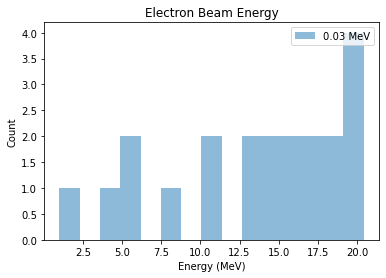

In [19]:
# Create histogram for each data set
plt.hist(t7e100_00_3[:,0], bins=15, alpha=0.5, label='0.03 MeV')
plt.legend(loc='upper right')
plt.title('Electron Beam Energy')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.show()

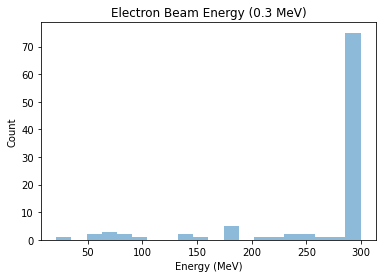

In [13]:
plt.hist(t7e100_0_3[:,0], bins=20, alpha=0.5)
plt.title('Electron Beam Energy (0.3 MeV)')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.show()

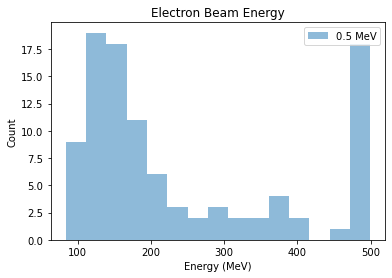

In [18]:
plt.hist(t7e100_0_5[:,0], bins=15, alpha=0.5, label='0.5 MeV')
plt.legend(loc='upper right')
plt.title('Electron Beam Energy')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.show()

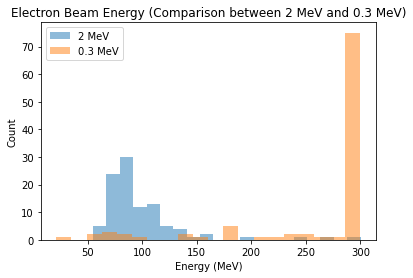

In [70]:
plt.hist(t7e100_2[:,0], bins=20, alpha=0.5,label='2 MeV')
plt.hist(t7e100_0_3[:,0], bins=20, alpha=0.5,label='0.3 MeV')
plt.legend(loc='upper left')
plt.title('Electron Beam Energy (Comparison between 2 MeV and 0.3 MeV)')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.show()

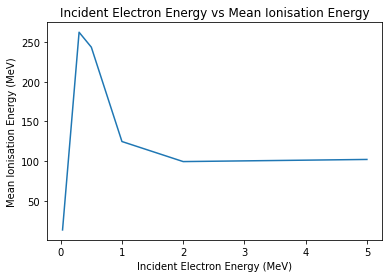

In [15]:
# calculate the mean of each dataset and plot the mean as point graph
mean_00_3 = np.mean(t7e100_00_3[:,0])
mean_0_3 = np.mean(t7e100_0_3[:,0])
mean_0_5 = np.mean(t7e100_0_5[:,0])
mean_1 = np.mean(t7e100_1[:,0])
mean_2 = np.mean(t7e100_2[:,0])
mean_5 = np.mean(t7e100_5[:,0])

mean = [mean_00_3, mean_0_3, mean_0_5, mean_1, mean_2, mean_5]
energy = [0.03, 0.3, 0.5, 1, 2, 5]

plt.plot(energy, mean)
plt.title('Incident Electron Energy vs Mean Ionisation Energy')
plt.xlabel('Incident Electron Energy (MeV)')
plt.ylabel('Mean Ionisation Energy (MeV)')
plt.show()

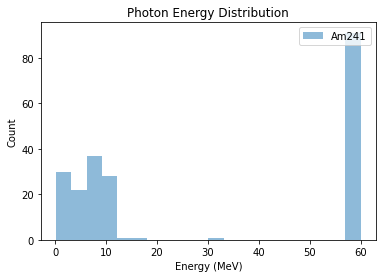

In [17]:
# plot the photon energy distribution for each dataset
# read data from simulation_data

taks8_Am241 = np.loadtxt('simulation_data/task_8_Am241_10000_60keV.txt',skiprows=1,delimiter=',')

plt.hist(taks8_Am241[:,0], bins=20, alpha=0.5, label='Am241')
plt.legend(loc='upper right')
plt.title('Photon Energy Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.show()



9.495798319327731 3.251789467145931


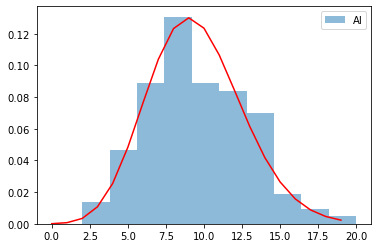

In [216]:
t11_2_Al = pd.read_csv('simulation_data/task_11_2_Al.csv')

#calculate the mean and standard deviation of data for dataframe
mean_Al = float(t11_2_Al.mean())
std_Al = float(t11_2_Al.std())
print(mean_Al, std_Al)

z, bin_edges = np.histogram(t11_2_Al, bins=10)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]
error = np.sqrt(z)

total_counts = np.sum(z)
normalized_counts = z/total_counts*bin_width

errors = np.sqrt(z)/(total_counts*bin_width)

mu = mean_Al
x = np.arange(0, 20, 1)
y = poisson.pmf(x, mu)

plt.hist(t11_2_Al, bins=10, alpha=0.5, label='Al', density=True)
#plt.bar(bin_centers, normalized_counts, width=bin_width, alpha=0.5, label='Al')
#plt.errorbar(bin_centers, normalized_counts, yerr=errors, fmt='o', color='black', label='Error')
plt.legend(loc='upper right')
plt.plot(x, y, color='red', label='Theoretical Poisson')
plt.show()

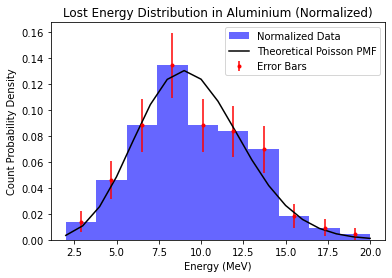

Mean: 9.491666666666667
Standard Deviation: 3.2384139528435814


In [219]:
# Working code here
# Load the new data from the uploaded CSV file
new_file_path = 'simulation_data/task_11_2_Al.csv'
new_data = pd.read_csv(new_file_path)

# Including the first value back to the data if it's considered as header by mistake
new_data_values = pd.concat([pd.Series([9.000]), new_data.iloc[:, 0]]).values

# Calculate mean and standard deviation of the new dataset
new_mean = np.mean(new_data_values)
new_std_dev = np.std(new_data_values, ddof=1)  # ddof=1 for sample standard deviation

# Plotting the normalized histogram for the new data
fig, ax = plt.subplots()
new_bin_counts, new_bin_edges, _ = ax.hist(new_data_values, bins=10, density=True, alpha=0.6, color='blue', label='Normalized Data')

# Calculate new bin centers and bin width
new_bin_centers = (new_bin_edges[:-1] + new_bin_edges[1:]) / 2
new_bin_width = np.diff(new_bin_edges)

# Total counts is just the length of new_data_values for normalization purposes
total_counts = len(new_data_values)

# Calculate the error for each bin (for normalized counts)
new_errors = np.sqrt(new_bin_counts * total_counts * new_bin_width) / (total_counts * new_bin_width)

# Add error bars
ax.errorbar(new_bin_centers, new_bin_counts, yerr=new_errors, fmt='.', color='red', label='Error Bars')

# Plot a theoretical Poisson distribution curve for the new data
new_x_range = np.arange(min(new_data_values), max(new_data_values)+1)
new_poisson_pmf = poisson.pmf(new_x_range, new_mean)

ax.plot(new_x_range, new_poisson_pmf, 'k-', label='Theoretical Poisson PMF')

ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Count Probability Density')
ax.set_title('Lost Energy Distribution in Aluminium (Normalized)')
ax.legend()

plt.show()

print(f"Mean: {new_mean}")
print(f"Standard Deviation: {new_std_dev}")


99.12605042016807 10.233340841440654


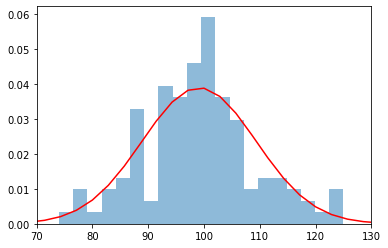

In [224]:
t12_1_Al = pd.read_csv('simulation_data/task_12_1_Al.csv')

#define gaussian function
def gaussian(x, mu, sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)

#calculate the mean and standard deviation of data for dataframe
mean_Al = float(t12_1_Al.mean())
std_Al = float(t12_1_Al.std())
print(mean_Al, std_Al)

z, bin_edges = np.histogram(t12_1_Al, bins=20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
error = np.sqrt(z)

# Draw gaussian distribution
x = np.linspace(0, 140)
y = gaussian(x, mean_Al, std_Al)

fig, ax1 = plt.subplots()

plt.hist(t12_1_Al, bins=20, alpha=0.5, label='Al',density = True)
#plt.errorbar(bin_centers, z, yerr=error, fmt='o', color='black')
plt.plot(x, y, color='red', label='Gaussian')
plt.xlim(70, 130)
plt.show()

/Users/liuhaoyun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


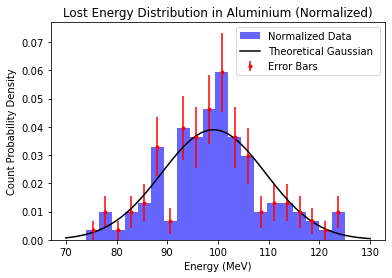

Mean: 99.12605042016807
Standard Deviation: 10.233340841440654


In [230]:
# Working code here
# Load the new data from the uploaded CSV file
new_file_path = 'simulation_data/task_12_1_Al.csv'
new_data_values = pd.read_csv(new_file_path)

# Including the first value back to the data if it's considered as header by mistake
#new_data_values = pd.concat([pd.Series([9.000]), new_data.iloc[:, 0]]).values

# Calculate mean and standard deviation of the new dataset
new_mean = float(np.mean(new_data_values))
new_std_dev = float(np.std(new_data_values, ddof=1))  # ddof=1 for sample standard deviation

# Plotting the normalized histogram for the new data
fig, ax = plt.subplots()
new_bin_counts, new_bin_edges, _ = ax.hist(new_data_values, bins=20, density=True, alpha=0.6, color='blue', label='Normalized Data')

# Calculate new bin centers and bin width
new_bin_centers = (new_bin_edges[:-1] + new_bin_edges[1:]) / 2
new_bin_width = np.diff(new_bin_edges)

# Total counts is just the length of new_data_values for normalization purposes
total_counts = len(new_data_values)

# Calculate the error for each bin (for normalized counts)
new_errors = np.sqrt(new_bin_counts * total_counts * new_bin_width) / (total_counts * new_bin_width)

# Add error bars
ax.errorbar(new_bin_centers, new_bin_counts, yerr=new_errors, fmt='.', color='red', label='Error Bars')

# Plot a theoretical Gaussian distribution curve using the mean and standard deviation of the new data
x_values = np.linspace(70, 130)
gaussian_pdf = norm.pdf(x_values, new_mean, new_std_dev)

ax.plot(x_values, gaussian_pdf, 'k-', label='Theoretical Gaussian ')

ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Count Probability Density')
ax.set_title('Lost Energy Distribution in Aluminium (Normalized)')
ax.legend(loc='upper right')

plt.show()

print(f"Mean: {new_mean}")
print(f"Standard Deviation: {new_std_dev}")


208.37954911433172
207.7646822688772
489.0


/Users/liuhaoyun/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


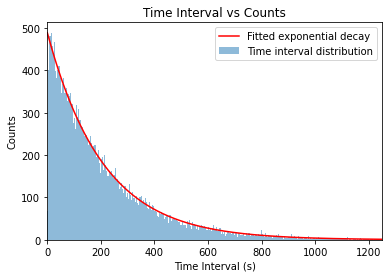

In [276]:
t13_1_IP = pd.read_csv('simulation_data/task_13_IP_1.csv')
t13_2_IP = np.loadtxt('simulation_data/task_13_IP_2.txt',skiprows=1)
t13_3_IP = np.loadtxt('simulation_data/task_13_IP_3.txt',skiprows=1)

interval_1 = t13_1_IP.iloc[:, 0]
counts_1 = t13_1_IP.iloc[:, 1]

interval_2 = t13_2_IP[:, 0]
counts_2 = t13_2_IP[:, 1]

# calculate the mean time between successive count, the first column is the time interval and the second column is the counts
# first column times the second column and then divide by the sum of the second column
# then sum the result
mean_interval_1 = np.sum(interval_1*counts_1)/np.sum(counts_1)
print(mean_interval_1)

mean_interval_2 = np.sum(interval_2*counts_2)/np.sum(counts_2)
print(mean_interval_2)

# fit the data to exponential decay
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(exp_decay, interval_1, counts_1, p0=(np.max(counts_1), mean_interval_1))
print(popt[0])

# calculate the bin width for the histogram
bin_width_1 = interval_1[1] - interval_1[0]

x = np.linspace(0, 1250, 1250)

#the data itself is a histogram, so we can plot it directly
plt.plot(x, exp_decay(x, popt[0],1/popt[1]), 'r-', label="Fitted exponential decay")
plt.bar(interval_1, counts_1, width = bin_width_1,alpha=0.5, label='Time interval distribution')
plt.title('Time Interval vs Counts')
plt.xlabel('Time Interval (s)')
plt.ylabel('Counts')
plt.xlim(0,1250)
plt.legend(loc='upper right')
plt.show()

8.83289244667503
0.015625
8.78924405353569
0.015625


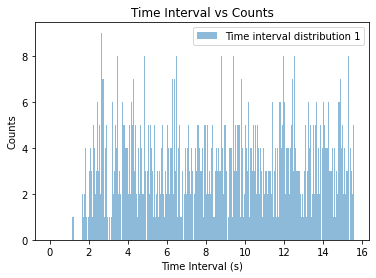

In [6]:
t14_1_IP = pd.read_csv('simulation_data/task_14_1_interval_31.25ns_60s.csv')
t14_2_IP = pd.read_csv('simulation_data/task_14_2_interval_31.25ns_20s.csv')

interval_1 = t14_1_IP.iloc[:, 0]
counts_1 = t14_1_IP.iloc[:, 1]
counts_1a = np.array(counts_1)

interval_2 = t14_2_IP.iloc[:, 0]
counts_2 = t14_2_IP.iloc[:, 1]

# calculate the mean time between successive count, the first column is the time interval and the second column is the counts
# first column times the second column and then divide by the sum of the second column
# then sum the result
mean_interval_1 = np.sum(interval_1*counts_1)/np.sum(counts_1)
print(mean_interval_1)
print(np.min(interval_1))

mean_interval_2 = np.sum(interval_2*counts_2)/np.sum(counts_2)
print(mean_interval_2)
print(np.min(interval_2))



# calculate the bin width for the histogram
bin_width_1 = interval_1[1] - interval_1[0]
bin_width_2 = interval_2[1] - interval_2[0]

# plot the data 1
plt.bar(interval_1, counts_1, width = bin_width_1,alpha=0.5, label='Time interval distribution 1')
plt.title('Time Interval vs Counts')
plt.xlabel('Time Interval (s)')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.show()



In [3]:
# reading all data from taks 16 folder
t16_1_0015 = pd.read_csv('task16/task_16_t1_d1.5.csv')
t16_2_0015 = pd.read_csv('task16/task_16_t2_d1.5.csv')
t16_3_0015 = pd.read_csv('task16/task_16_t3_d1.5.csv')
t16_1_0020 = pd.read_csv('task16/task_16_t1_d_2.csv')
t16_2_0020 = pd.read_csv('task16/task_16_t2_d_2.csv')
t16_3_0020 = pd.read_csv('task16/task_16_t3_d_2.csv')
t16_1_0025 = pd.read_csv('task16/task_16_t1_d_2.5.csv')
t16_2_0025 = pd.read_csv('task16/task_16_t2_d_2.5.csv')
t16_3_0025 = pd.read_csv('task16/task_16_t3_d_2.5.csv')
t16_1_0030 = pd.read_csv('task16/task_16_t1_d_3.csv')
t16_2_0030 = pd.read_csv('task16/task_16_t2_d_3.csv')
t16_3_0030 = pd.read_csv('task16/task_16_t3_d_3.csv')
t16_1_0035 = pd.read_csv('task16/task_16_t1_d_3.5.csv')
t16_2_0035 = pd.read_csv('task16/task_16_t2_d_3.5.csv')
t16_3_0035 = pd.read_csv('task16/task_16_t3_d_3.5.csv')
t16_1_004 = pd.read_csv('task16/task_16_t1_d4.csv')
t16_2_004 = pd.read_csv('task16/task_16_t2_d4.csv')
t16_3_004 = pd.read_csv('task16/task_16_t3_d4.csv')
t16_1_0052 = pd.read_csv('task16/task_16_t1_d_5.2.csv')
t16_2_0052 = pd.read_csv('task16/task_16_t2_d_5.2.csv')
t16_3_0052 = pd.read_csv('task16/task_16_t3_d_5.2.csv')
t16_1_0065 = pd.read_csv('task16/task_16_t1_d6.5.csv')
t16_2_0065 = pd.read_csv('task16/task_16_t2_d6.5.csv')
t16_3_0065 = pd.read_csv('task16/task_16_t3_d6.5.csv')
t16_1_009 = pd.read_csv('task16/task_16_t1_d9.csv')
t16_2_009 = pd.read_csv('task16/task_16_t2_d9.csv')
t16_3_009 = pd.read_csv('task16/task_16_t3_d9.csv')
t16_1_0115 = pd.read_csv('task16/task_16_t1_d11.5.csv')
t16_2_0115 = pd.read_csv('task16/task_16_t2_d11.5.csv')
t16_3_0115 = pd.read_csv('task16/task_16_t3_d11.5.csv')
t16_1_0165 = pd.read_csv('task16/task_16_t1_d16.5.csv')
t16_2_0165 = pd.read_csv('task16/task_16_t2_d16.5.csv')
t16_3_0165 = pd.read_csv('task16/task_16_t3_d16.5.csv')
t16_1_0215 = pd.read_csv('task16/task_16_t1_d21.5.csv')
t16_2_0215 = pd.read_csv('task16/task_16_t2_d21.5.csv')
t16_3_0215 = pd.read_csv('task16/task_16_t3_d21.5.csv')
t16_1_0315 = pd.read_csv('task16/task_16_t1_d31.5.csv')
t16_2_0315 = pd.read_csv('task16/task_16_t2_d31.5.csv')
t16_3_0315 = pd.read_csv('task16/task_16_t3_d31.5.csv')
t16_1_0515 = pd.read_csv('task16/task_16_t1_d_51.5.csv')
t16_2_0515 = pd.read_csv('task16/task_16_t2_d_51.5.csv')
t16_3_0515 = pd.read_csv('task16/task_16_t3_d_51.5.csv')
t16_1_0715 = pd.read_csv('task16/task_16_t1_d_71.5.csv')
t16_2_0715 = pd.read_csv('task16/task_16_t2_d_71.5.csv')
t16_3_0715 = pd.read_csv('task16/task_16_t3_d_71.5.csv')
t16_1_0915 = pd.read_csv('task16/task_16_t1_d_91.5.csv')
t16_2_0915 = pd.read_csv('task16/task_16_t2_d_91.5.csv')
t16_3_0915 = pd.read_csv('task16/task_16_t3_d_91.5.csv')

# store all data in a list
t16_data = [t16_1_0015, t16_2_0015, t16_3_0015, t16_1_0020, t16_2_0020, t16_3_0020, t16_1_0025, t16_2_0025, t16_3_0025, t16_1_0030, t16_2_0030, t16_3_0030, t16_1_0035, t16_2_0035, t16_3_0035, t16_1_004, t16_2_004, t16_3_004, t16_1_0052, t16_2_0052, t16_3_0052, t16_1_0065, t16_2_0065, t16_3_0065, t16_1_009, t16_2_009, t16_3_009, t16_1_0115, t16_2_0115, t16_3_0115, t16_1_0165, t16_2_0165, t16_3_0165, t16_1_0215, t16_2_0215, t16_3_0215, t16_1_0315, t16_2_0315, t16_3_0315, t16_1_0515, t16_2_0515, t16_3_0515, t16_1_0715, t16_2_0715, t16_3_0715, t16_1_0915, t16_2_0915, t16_3_0915]


[233.10299632 224.72962672 179.33715075 179.81623863 140.15420813
 133.6488642   95.37842238  95.99932587  62.52888579  51.18544833
  37.23469358  27.9845533   19.45509168  11.12097424   7.3647722
   5.71501237]
[3.54795492 3.1728888  2.98346139 2.7507351  2.48031899 2.21666395
 1.77641753 1.48959119 1.15229399 1.056742   1.15321328 1.35748687
 1.95003792 2.95387454 3.76657452 4.78535252]
Slope: -4.598807338432811 Intercept: 15.91879173731501 R^2 value: 0.9920139172622315 P value: 1.328781901103024e-08 Intercept Standard Error: 0.15595676418971102


/var/folders/gv/qbc73sc927g657t_jp2qq0800000gn/T/ipykernel_25512/2694438748.py:59: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1)


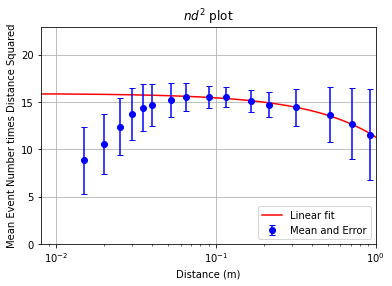

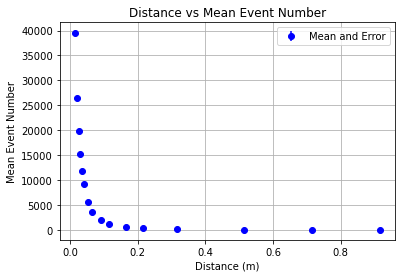

In [96]:
# calculate the mean and standard deviation of data for dataframe and store it into two lists, every 3 data is a set
# calculate the mean for each data and calculate the mean for each set
# then plot the mean and standard deviation of the data
distance = [1.5, 2, 2.5, 3, 3.5, 4, 5.2, 6.5, 9, 11.5, 16.5, 21.5, 31.5, 51.5, 71.5, 91.5]
distance = np.array(distance)/100
mean_list = []
std_list = []

for i in range(0, len(t16_data), 3):
    mean = (float(t16_data[i].mean()) + float(t16_data[i+1].mean()) + float(t16_data[i+2].mean()))/3
    std = (float(t16_data[i].std()) + float(t16_data[i+1].std()) + float(t16_data[i+2].std()))/2 # degree of freedom of standard deviation is n - 1. n is the number of set of data
    mean_list.append(mean)
    std_list.append(std)

# create a new list for mean times square of distance
mean_list = np.array(mean_list)
std_list = np.array(std_list)
std_dis = 0.03/distance
distance = np.array(distance)
mean_list_d2 = mean_list*distance**2
std_list_d2 = np.sqrt(mean_list*distance**2+(2*mean_list*distance*0.003)**2)
std_list_d2_1 = mean_list*distance**2*np.sqrt((std_list/np.array(mean_list))**2+(2*0.003/np.array(distance))**2)
x = np.linspace(0, 1, 100)

print(std_list)
print(std_list_d2_1)

#print(mean_list*distance**2+2*mean_list*distance*0.003**2)
std_mean = np.sqrt(np.sum((mean_list_d2-mean_list_d2.mean())**2)/(len(mean_list_d2)-1))
# print("Overall mean:", mean_list_d2.mean(), "+ \ -", std_mean)


# extract the data for the linear fit
d_drop716 = distance[6:16]
d_2drop716 = mean_list_d2[6:16]

d_drop616 = distance[5:16]
d_2drop616 = mean_list_d2[5:16]

d_drop816 = distance[7:16]
d_2drop816 = mean_list_d2[7:16]


# linear fit to d_drop
slope, intercept, r_value, p_value, intercept_stderr = stats.linregress(d_drop816,d_2drop816)
print("Slope:", slope, "Intercept:", intercept, "R^2 value:", r_value**2, "P value:", p_value,  "Intercept Standard Error:", intercept_stderr)



# plot the mean and standard deviation of the data
plt.plot(x, slope*x+intercept, label="Linear fit", color = "red")
plt.errorbar(distance, mean_list_d2, yerr=std_list_d2_1, fmt='o', capsize=3,color='blue', label='Mean and Error')
plt.xlabel('Distance (m)')
plt.ylabel('Mean Event Number times Distance Squared')
plt.legend(loc='lower right')
plt.grid()
plt.xscale('log')
plt.ylim(0,23)
plt.xlim(0,1)
plt.title('$nd^2$ plot')
plt.show()


plt.errorbar(distance, mean_list, yerr=std_list, fmt='o', color='blue', label='Mean and Error')
plt.title('Distance vs Mean Event Number')
plt.xlabel('Distance (m)')
plt.ylabel('Mean Event Number')
plt.legend(loc='upper right')
plt.grid()
plt.show()

The mean number of events at small distance is significant lower then others, this is because the number of event is really large at small distance, due to the dead time of the silicon detector, there should be a large number of events are not detected.

Make d = 6.5 cm as reference, merge the following data to approximate mean. 

In [36]:
# Estimate the activity of the source
# The activity is the mean event number times distance squared divided by the mean time interval between successive count
# and the error is the square root of the sum of the square of the standard deviation of the mean event number times distance squared
# and the square of the standard deviation of the mean time interval between successive count
print(mean_list_d2)
print(mean_interval_1)
activity = (mean_list_d2/mean_interval_1).mean()
error = np.sqrt(std_list**2 + (mean_interval_1*0.1)**2)
print(activity)
print(error)

[ 8.8689181  14.70883678 15.52750731 15.52522041 15.55304722 15.11959167
 14.7486236  14.48107852]
8.83289244667503
1.620828402324175
[155.40450779  89.10362095  64.00564564  41.69528088  34.13506226
  24.83883926  18.67726691  13.00010328]


In [ ]:
# The relative error plot

relative_error = math.sqrt(1/mean_list + (0.6/distance**2)**2)

# plot the relatice error of the data
plt.errorbar(distance, relative_error, fmt='o', color='black', label='Error')


In [ ]:
# calculate the mean of the 7th to 13th data of the mean_list_d2
mean_7_13 = mean_list_d2[4:13].mean()
print(mean_7_13)

# doing chi square test for the mean_list_d2
# calculate the expected value
expected = mean_list_d2.mean()
# calculate the chi square value
chi_square = np.sum((mean_7_13-expected)**2/expected)
print("chi^2:", chi_square)

# calculate the p value
p_value = 1 - stats.chi2.cdf(chi_square, 8)
print("P:",p_value)

# calculate the R squared value
ss_res = np.sum((mean_list_d2 - mean_list_d2.mean())**2)
ss_tot = np.sum((mean_list_d2 - mean_7_13)**2)
r_squared = 1 - (ss_res/ss_tot)
print("R^2:",r_squared)